# Lab 3: Answers



## Let's begin with some review problems from the previous lab

1) Start by importing the sales dataset. It should be on the google drive, but if you can't find it or want more information, you can find a link to it here: https://www.kaggle.com/aungpyaeap/supermarket-sales

Use the head() function to view the columns and first five rows of the data set. 

In [2]:
import pandas as pd

df = pd.read_csv ('supermarket_sales - Sheet1.csv')

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


2) Which variables are quantitative? Which are qualitative?

In [ ]:

Quantitative - Quantity, Tax 5%, Total Unit Price, Quantity, Tax, total, date, time, cogs, Gross Margin Percentage, gorss income, ratings
Qualitative - Customer Type, Gender, Product Line, Payment, Branch 


3) Create a histogram of the Unit Price variable. Make sure to have proper axis labels and a title. 

Text(0.5, 1.0, 'Unit Price Histogram')

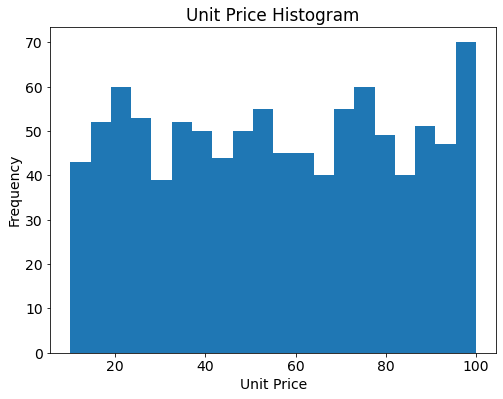

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

df['Unit price'].plot(kind='hist', bins=20);
plt.ylabel('Frequency')
plt.xlabel('Unit Price')
plt.title('Unit Price Histogram')

4) Describe the histogram that you've created. What kind of distribution does it appear to be? Remember to describe the shape, center, and spread. 

Center is located around 55.
There is no unsual things on this plot.
This looks like a uniform shape.
The spread looks like ~10-100

## One-proportion hypothesis testing practice

5) Say that your boss says that 50% of the sampled people who come to the stores are men. Test his hypothesis using the one-proportion hypothesis test. Start by importing the necessary packages, then set the variables for the sample size, the sample success and the null hypothesis. Lastly, run the hypothesis test using the proportions_ztest function from the imported library. Run this test at the 5% confidence interval. 

In [27]:
df.groupby(['Gender']).count()

,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Gender,,,,,,,,,,,,,,,,
Female,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501
Male,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499


In [91]:
from statsmodels.stats.proportion import proportions_ztest
# Based on the data on the csv file there are 1000 people. We want to make sure 500 of them are male.
sample_success = 500
sample_size = 1000
null_hypothesis = .5
# for ha != ho use alternative = 'two-sided'
proportions_ztest(count=sample_success, nobs=sample_size, value=null_hypothesis, alternative='two-sided')

(0.0, 1.0)

6) Interpret your results in the context of the problem. 

Based on this P value we see that it greater than our $\alpha$. We failed to reject the null hypothesis that 50% of the sampled people who come to the stores are men.

## Two-proportion hypothesis testing practice

7) A competing company tells you that 400 out of their total 1000 sales were from males. Compare this value to the proportion of males that in your store. 

These are 499/1000=0.499 people at our store who are male vs 400/1000=0.4

8) Interpret your p value in the context of the problem. 

In [4]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
sample_success_a, sample_size_a = (499, 1000)
sample_success_b, sample_size_b = (400, 1000)
# check our sample against Ho for Ha != Ho
successes = np.array([sample_success_a, sample_success_b])
samples = np.array([sample_size_a, sample_size_b])
proportions_ztest(count=successes, nobs=samples,  alternative='two-sided')

(4.4501708749605955, 8.580199341948195e-06)

We get a P-Value of 0.00000858. which means we can reject the null hypothesis.

## One mean hypothesis testing practice


9) Your company wants to know if the mean for 'Total price' is greater than 325 dollars. Use a hypothesis test with a 5% confidence level to calculate the appropriate p value. 

In [8]:
from scipy.stats import truncnorm
from statsmodels.stats.weightstats import DescrStatsW as stats

sig = .05
null_hypo = 325
# find sample mean

sample_mean_a = df['Total'].mean()
sample_dev_a = df['Total'].std()
sample_size_a = len(df)

sample_a = np.random.normal(loc=sample_mean_a, scale=sample_dev_a, size=sample_size_a)
'''
ho: Total Price is greater than 325
ha: Total Price is less than 325?
ha < ho => smaller? No,larger
'''
(t_stat, p_value, degree_of_freedom) = stats(sample_a).ttest_mean(null_hypo, 'larger')

print('t_stat: %0.3f, p_value: %0.3f' % (t_stat, p_value))



t_stat: -2.523, p_value: 0.994


10) Interpret your p value in context. 

The calculated P-Value is 0.184 is greater than $\alpha$ = 0.05. We can fail to reject the null hypothesis and say the result is significant.


## Two mean hypothesis testing practice

11) Your boss believes that, on average, women spend more money than men. Check his hypothesis using the sales data set and a 10% significance value. 

In [9]:
'''
Test that on average: women spend more than men.
Sig = .1
'''
from scipy.stats import truncnorm
from statsmodels.stats.weightstats import ttest_ind

significance = 0.1
'''
    on average, women
'''
# Get means of total spend by gender
new_df = df.groupby('Gender', as_index=False).Total.mean()
# Creates a new df with female and male with thier mean total spending

avg_spending_female = new_df['Total'][0]
avg_spending_male = new_df['Total'][1]

# we are checking if women spend more than males
# ho_Females > 310.79
null_hypothesis = 310

# Calculated from the dataset
min, max = (10.6785, 1042.65)

# Are we supposed to take a sample of the dataset?
f_dev = df.loc[df['Gender']=='Female'].Total.std()
f_mean = df.loc[df['Gender']=='Female'].Total.mean()
f_size =len(df.loc[df['Gender']=='Female'].Total.index)

m_dev = df.loc[df['Gender']=='Male'].Total.std()
m_mean = df.loc[df['Gender']=='Male'].Total.mean()
m_size =len(df.loc[df['Gender']=='Male'].Total.index)

sample_mean_v1, sample_dev_v1, sample_size_v1 = (f_mean, f_dev, f_size)
sample_mean_v2, sample_dev_v2, sample_size_v2 = (m_mean, m_dev, m_size)

# Get samples
sample_v1 = df.loc[df['Gender']=='Male'].Total
sample_v2 = df.loc[df['Gender']=='Female'].Total

(t_stat, p_value, degree_of_freedom) = ttest_ind(sample_v2, sample_v1, alternative='larger')
# report
print('t_stat: %0.3f, p_value: %0.3f' % (t_stat, p_value))

t_stat: 1.564, p_value: 0.059


12) Interpret your p value in context. 

We got a p_value = 0.059 which is less than $\alpha$ = 0.1 there for we can conclude that we can reject the null hypothesis. 

## Hypothesis testing Challenge Problems

In the last few problems, we will not tell you which hypothesis test to use. Try to figure it out yourself! 

As we did for the problems earlier in the lab, use the sales data set for the following problems. 

#### Challenge problem 1

Is there a statistically significant difference between the average Total for people who paid with credit card versus the people who paid with cash? Calculate the p value at the 5% significance level. 

In [ ]:
# Two Mean
# find if there is a significant difference between average total for paid in credit card vs cash
# Sig lv = .05



#### Challenge problem 2

At the 10% significance level, test the hypothesis that the gross income is, on average, higher in branch A than in branch C. 

In [ ]:
# Two means

#### Challenge problem 3

At the 5% significance level, test the hypothesis that the mean gross income in Yangon is greater than 30. 

In [ ]:
# Single Mean

#### Challenge problem 4

At the 10% significance level, test the hypothesis that half of the COGS (Cost of goods sold) is greater than 400. 

In [ ]:
# single Proportion

#### Challenge problem 5

First, find the mean number of products bought (using the quantity variable)

In [ ]:
# Single Mean

A competitor has an average of 9.2 products bought. Is your store's average statistically significantly different? 